# Mini Project 3: Machine Learning For Analysis And Prediction

#### Created by Group 4 - Alberte & Felicia

This notebook analyzes the IBM HR Employee Attrition dataset. We apply machine learning techniques to answer key questions about employee behavior, particularly focusing on attrition, salary prediction, and clustering. The code is organized and annotated for reproducibility and educational clarity.

-------------------

## Project Objectives and Task Breakdown

**Assignment Objective**:
> Understand why employees leave a company and predict attrition, income, and cluster employee profiles using regression, classification, and clustering.

**Tasks**:
1. Data wrangling and exploration  
2. Regression (predict `MonthlyIncome`)  
3. Classification (predict `Attrition`)  
4. Clustering (unsupervised grouping of employees)  
5. Deployment for app use (optional)

Each section includes code, output, explanations, and summaries.

------------------------------------

## Dataset Handling and Versioning During Preprocessing

We are working with a single dataset (df_raw) which contains the original IBM HR Employee Attrition data. To ensure a structured and error-free preprocessing workflow, we maintain separate versions of the dataset at key stages:

**df:** A working copy of the raw data used for all cleaning and transformations.

**df_encoded:** A version saved after encoding categorical variables.

**df_clean:** The final version of the fully preprocessed dataset, ready for modeling.

This approach allows us to track changes, avoid accidental data loss, and reuse specific versions for different machine learning tasks (e.g., regression, classification, clustering).

Before we begin analyzing the IBM HR dataset, we need to import a few essential Python libraries that will help us work with the data easily.

- **Pandas**: This is a powerful library used to handle and manipulate data in tables (called DataFrames).
- **NumPy**: It helps with numerical operations, especially when we work with arrays or need to do math.
- **Matplotlib** and **Seaborn**: These are popular libraries for creating visual charts and graphs. We'll use them to help us understand the data better by seeing it.
- **SciPy (stats module)**: This gives us access to statistical tools like checking if data is normally distributed.

We also set some default styles for our plots to make them look nicer and easier to read.

In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Set plot styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

------------------------------

# Data wrangling and exploration

### 1. Load and Preview the Dataset

Now that we have the tools ready, we need to load our data into Python so we can work with it. In this case we are only working with one dataset. 
We will define a simple function that uses `pandas` to read an Excel file and return it as a DataFrame. Then we use this function to load the file into memory.
We begin by loading the IBM HR dataset. It contains employee-related information such as age, salary, job role, and whether the employee has left the company.
We use `.head()` and `.shape` to get a quick overview of the data structure and dimensions.

In [279]:
import pandas as pd

# Define the path to the CSV dataset
file_path = '../data/IBM_HR_Employee_Attrition.csv'


# Function to load a CSV file into a DataFrame
def load_csv_to_dataframe(path):
    """
    Loads a CSV file into a pandas DataFrame.
    
    Parameters:
    - path (str): The file path to the CSV file
    
    Returns:
    - DataFrame: Loaded dataset
    """
    df_raw = pd.read_csv(path)
    return df_raw

# Load the dataset
print("Loading IBM HR Employee Attrition dataset...")
df_raw = load_csv_to_dataframe(file_path)

# Confirm the dataset was loaded
print("Dataset loaded with shape:", df_raw.shape)

# Create a working copy for processing
df = df_raw.copy()


Loading IBM HR Employee Attrition dataset...
Dataset loaded with shape: (1470, 35)


In [15]:
# Preview the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
# Show all columns in a single-column DataFrame
all_columns = pd.DataFrame({'All Columns': df.columns})
display(all_columns)


,All Columns
0,Age
1,Attrition
2,BusinessTravel
3,DailyRate
4,Department
5,DistanceFromHome
6,Education
7,EducationField
8,EmployeeCount
9,EmployeeNumber


### Summary: Dataset Overview and Loading

We began by importing the IBM HR Employee Attrition dataset using a custom CSV loader function. This dataset contains 1,470 employee records with a wide range of features including demographic information (such as `Age`, `Gender`, `DistanceFromHome`), job-related factors (`JobRole`, `Department`, `BusinessTravel`), compensation details (`MonthlyIncome`, `HourlyRate`), and satisfaction indicators (`JobSatisfaction`, `EnvironmentSatisfaction`).
The target variable for our classification task is `Attrition`, which indicates whether an employee has left the company (`Yes`) or stayed (`No`). This preview confirms that the dataset includes both numerical and categorical features, making it suitable for multiple machine learning tasks: regression, classification, and clustering.

### 2. Initial Inspection for Missing Values and Data Types

In [24]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

In [26]:
# Overview of column data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Summary: Initial Data Inspection

We begin by inspecting the dataset to ensure it is suitable for analysis. First, we confirm that there are no missing values across any of the 35 columns, which means we do not need to perform imputation or removal of incomplete rows.

Next, we check the data types and find that 26 columns are numerical (int64) and 9 are categorical (object). These will later guide how we apply preprocessing techniques like scaling and encoding.

We also review summary statistics for the numerical features. Some columns — such as StandardHours, Over18, and EmployeeCount — have no variation (standard deviation = 0), which suggests they do not contribute any useful information and can be removed later. Additionally, variables like MonthlyIncome, TotalWorkingYears, and YearsAtCompany show large ranges, indicating the presence of outliers or skewness. These patterns are important for later feature engineering and model selection.

In [285]:
# Summary stats for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### 3. Remove Irrelevant or Redundant Columns

Some columns have the same value in every row or serve as unique identifiers. These do not help with predictions and can be removed.

In [33]:
# Identify columns with only one unique value
print("Columns with only one unique value:")
print(df.nunique()[df.nunique() == 1])

# Drop irrelevant columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=columns_to_drop, inplace=True)

# Confirm the new shape
print("Shape after dropping irrelevant columns:", df.shape)

Columns with only one unique value:
EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64
Shape after dropping irrelevant columns: (1470, 31)


#### Summary: Removal of Irrelevant Columns

We identify several columns that are either constant across all records or serve only as unique identifiers. These include:
- `EmployeeCount`, `StandardHours`, and `Over18` — all of which contain only one unique value
- `EmployeeNumber`, which uniquely identifies each employee

Since these columns do not provide useful information for prediction, we remove them to streamline the dataset and reduce noise. This reduces the number of features from 35 to 31.


### 4. Remove Duplicate Rows

Duplicate rows do not provide any new information and could bias the analysis. We identify and remove them here.

In [38]:
# Check for and remove duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Remove any duplicates found
df = df.drop_duplicates()

# Confirm the shape after removing duplicates
print("Shape after removing duplicates:", df.shape)

Number of duplicate rows: 0
Shape after removing duplicates: (1470, 31)


#### Summary: Duplicate Row Check

To ensure the dataset does not contain redundant or repeated records, we check for duplicate rows. None are found, confirming that each row represents a unique employee. This maintains the total at 1,470 entries.

--------------------------------

### DATA CLEANING

In this section, we prepared the IBM HR dataset for analysis and machine learning:

- Loaded the dataset correctly.
- Dropped irrelevant columns: `EmployeeCount`, `Over18`, `StandardHours`, and `EmployeeNumber`.
- Checked for and removed duplicate rows.
- Verified there are no missing values.
- Saved a cleaned version of the dataset as `df_clean.csv` for future use in modeling.

This version (`df_clean`) will now be used in feature encoding, regression, classification, and clustering tasks.


In [44]:
# Save cleaned dataframe to use for modeling
df_clean = df.copy()  
df_clean.to_csv("df_clean.csv", index=False)  # Save cleaned dataset to file
print("Cleaned dataset saved as 'df_clean.csv' with shape:", df_clean.shape)

Cleaned dataset saved as 'df_clean.csv' with shape: (1470, 31)


#### Summary: Finalizing the Cleaned Dataset

After cleaning the dataset by removing irrelevant columns and checking for duplicates and missing values, we create a saved version called `df_clean.csv`. This version serves as the starting point for all further modeling tasks — regression, classification, and clustering — and ensures consistency throughout the project.


---------------------------------

### EXPLORE THE DATA

Separating numerical and categorical features is a crucial step in preparing data for machine learning. This distinction allows us to apply the appropriate preprocessing techniques to each type of feature. Numerical features, such as Age, MonthlyIncome, and YearsAtCompany, often require scaling to ensure that they are on a comparable range. This improves model performance and stability, especially for algorithms sensitive to feature magnitudes, such as linear regression or K-nearest neighbors. On the other hand, categorical features like JobRole, Gender, and Department must be transformed into numerical representations since most machine learning algorithms cannot interpret text directly. Binary categories can be handled using label encoding (e.g., Yes = 1, No = 0), while features with multiple categories are typically converted using one-hot encoding. By identifying and separating feature types early, we ensure that each column is treated appropriately and avoid common data preparation errors. This step leads to more accurate, robust, and interpretable models.

### 5. Numerical Columns for Outliers or Errors

Here we use summary statistics to look for unusual values in numeric columns that could indicate data quality issues or outliers.

In [52]:
# Statistical summary of numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


#### Summary: Statistical Overview of Numerical Features

We generate descriptive statistics for all numerical columns to understand their distributions and detect potential data quality issues.

From the output:
- `Age` ranges from 18 to 60, which is typical for a working population.
- `MonthlyIncome` ranges from 1,009 to nearly 20,000, suggesting the presence of high earners or outliers.
- Tenure-related fields such as `YearsAtCompany`, `YearsInCurrentRole`, and `YearsSinceLastPromotion` contain values as low as 0, indicating newly hired or recently promoted employees.
- Some columns like `StandardHours`, `EmployeeCount`, and `Over18` show zero variance, meaning they contain the same value for all records.

These findings help us detect columns that do not contribute any useful variation and identify others that may require transformation or special attention due to skewed values or outliers.


### 6. Categorical Values

We examine the unique values in each categorical column to check for inconsistencies or data entry errors (e.g., typos).

In [57]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Print unique values and count for each categorical column
print("Categorical Columns Overview:\n")
for col in categorical_columns:
    unique_vals = sorted(df[col].unique())
    print(f"{col} ({len(unique_vals)} unique): {unique_vals}")

# Prepare structured summary
cat_summary = []

for col in categorical_columns:
    unique_vals = sorted(df[col].unique())
    n_unique = len(unique_vals)
    
    # Decide encoding type
    if n_unique == 2:
        encoding_type = 'Label Encoding'
    else:
        encoding_type = 'One-Hot Encoding'
    
    cat_summary.append({
        'Column': col,
        'Unique Count': n_unique,
        'Unique Values': unique_vals,
        'Recommended Encoding': encoding_type
    })

# Create DataFrame for display
df_cat_summary = pd.DataFrame(cat_summary)

# Display in Jupyter
display(df_cat_summary)


Categorical Columns Overview:

Attrition (2 unique): ['No', 'Yes']
BusinessTravel (3 unique): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department (3 unique): ['Human Resources', 'Research & Development', 'Sales']
EducationField (6 unique): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender (2 unique): ['Female', 'Male']
JobRole (9 unique): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus (3 unique): ['Divorced', 'Married', 'Single']
OverTime (2 unique): ['No', 'Yes']


,Column,Unique Count,Unique Values,Recommended Encoding
0,Attrition,2,"[No, Yes]",Label Encoding
1,BusinessTravel,3,"[Non-Travel, Travel_Frequently, Travel_Rarely]",One-Hot Encoding
2,Department,3,"[Human Resources, Research & Development, Sales]",One-Hot Encoding
3,EducationField,6,"[Human Resources, Life Sciences, Marketing, Me...",One-Hot Encoding
4,Gender,2,"[Female, Male]",Label Encoding
5,JobRole,9,"[Healthcare Representative, Human Resources, L...",One-Hot Encoding
6,MaritalStatus,3,"[Divorced, Married, Single]",One-Hot Encoding
7,OverTime,2,"[No, Yes]",Label Encoding


#### Summary: Categorical Column Inspection

We inspect all object-type columns to understand their unique values and prepare them for encoding. There are 9 categorical features in the dataset.

From the output:
- Binary features like `Attrition`, `Gender`, and `OverTime` have two clear, well-defined values and are suitable for label encoding.
- Nominal features such as `JobRole`, `Department`, and `EducationField` contain more than two categories and are suitable for one-hot encoding.

We find no formatting errors, typos, or inconsistencies. Each category is interpretable and cleanly defined. We also create a summary table listing the number of unique values and the recommended encoding type for each column. This prepares the dataset for the next stage of preprocessing.


### 7. Identify Column Types for Preprocessing

Separating features by data type—numerical and categorical—is essential for applying the correct preprocessing techniques, such as scaling numerical variables and encoding categorical ones.

In [62]:
# Identify column types for preprocessing
numerical_columns = df.select_dtypes(include='number').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

print(f"Found {len(numerical_columns)} numerical columns:")
print(numerical_columns)

print(f"\nFound {len(categorical_columns)} categorical columns:")
print(categorical_columns)

Found 23 numerical columns:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Found 8 categorical columns:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


#### Summary: Identifying Column Types for Preprocessing

To apply appropriate preprocessing techniques, we separate the dataset into numerical and categorical columns.

Our analysis identifies:
- **23 numerical columns**, including income, job level, years at company, satisfaction scores, and tenure measures.
- **8 categorical columns**, such as `Attrition`, `Gender`, `JobRole`, and `MaritalStatus`.

This separation is essential because numerical features may require scaling, and categorical features must be encoded. It also helps structure our preprocessing pipeline clearly for regression and classification tasks.


### 8. Convert Object Columns to 'Category' Type

This step improves memory usage and makes it clearer which features are categorical.

In [67]:
# Convert all object-type columns to category type
df[categorical_columns] = df[categorical_columns].astype('category')

# Confirm the change
print(df[categorical_columns].dtypes)

Attrition         category
BusinessTravel    category
Department        category
EducationField    category
Gender            category
JobRole           category
MaritalStatus     category
OverTime          category
dtype: object


#### Summary: Convert Object Columns to Categorical Type

We explicitly convert all object-type columns to the `category` data type. This does not change the values in the dataset but clarifies their intended use as categorical features.

This step:
- Improves memory efficiency
- Helps avoid confusion during encoding
- Ensures that machine learning pipelines correctly interpret these columns as non-numeric

This conversion also aligns with our earlier encoding plan and supports clean automation in future steps.


### 9. Encode Categorical Variables

#### 9.1 Encode Binary Categorical Columns (Label Encoding)

In [72]:
# Copy from cleaned DataFrame
df_encoded = df.copy()

# --- Encode binary categories ---
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})
df_encoded['OverTime'] = df_encoded['OverTime'].map({'Yes': 1, 'No': 0})
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})

# --- One-hot encode nominal categorical variables ---
df_encoded = pd.get_dummies(df_encoded, columns=[
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus'
], drop_first=True)

# Save the final dataset
df_encoded.to_csv("df_encoded.csv", index=False)
print("Final encoded dataset saved as 'df_encoded.csv' with shape:", df_encoded.shape)


Final encoded dataset saved as 'df_encoded.csv' with shape: (1470, 45)


#### Summary: Encoding Categorical Features

We convert all categorical variables to numeric format to prepare the dataset for machine learning:

- **Binary features** (`Attrition`, `Gender`, `OverTime`) are encoded using simple value mapping:  
  - `Yes` → 1, `No` → 0  
  - `Male` → 1, `Female` → 0  

- **Multi-class nominal features** (`BusinessTravel`, `Department`, `EducationField`, `JobRole`, `MaritalStatus`) are encoded using one-hot encoding, with `drop_first=True` to avoid multicollinearity.

As a result, we produce a fully numeric dataset called `df_encoded`, which we save to file for use in all modeling tasks: regression, classification, and clustering.


### 10. Data preparation for Modeling

#### 10.1 Define Dependent and Independent Variables

In supervised machine learning, we need to clearly separate the data we are using for prediction (input) from the data we are trying to predict (output). 

We defined:
- `X` as the **independent variables** – these are all the input features that could help us predict salary, such as experience, job role, education, and performance.
- `y` as the **dependent variable** – this is the value we want to predict, which is `MonthlyIncome`.

This separation allows us to train a model by showing it examples of inputs and their corresponding outputs, so it can learn the relationship and make accurate predictions on new data later.

In [78]:
# Define target variable (dependent)
y = df_encoded['MonthlyIncome']

# Define input features (independent)
X = df_encoded.drop(['MonthlyIncome'], axis=1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (1470, 44)
y shape: (1470,)


#### Summary: Define Dependent and Independent Variables

From the output:
- `X` contains 1,470 rows and 44 features.
- `y` is a single column with 1,470 salary values.

This setup allows us to train regression models that can learn how different factors (like job level, education, and years of experience) relate to employee income.


#### 10.2 Descriptive Statistics for Numeric Data

Before training a model, it's important to understand the general properties of our data. We calculated key descriptive statistics – such as the mean, standard deviation, minimum and maximum – for each numeric feature.

This helps us:
- Identify any strange values or outliers (e.g., a salary that is extremely high or a performance rating that is always the same)
- Understand the range of each feature, which can be useful later when deciding whether to scale the data
- Spot potential issues with data quality

For example, if a column has a very small standard deviation, it means the values don’t vary much and it may not be useful in a predictive model.

In [83]:
# Show summary statistics for all numerical features
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


#### Summary: Descriptive Statistics for Numerical Features

We compute summary statistics for all numeric columns in the dataset. This helps us understand the spread, center, and potential issues with each feature.

Key observations:
- `MonthlyIncome` has a wide range, from 1,009 to 19,999, with a high standard deviation, suggesting skewness and the presence of outliers.
- Several tenure-related features such as `YearsAtCompany`, `YearsSinceLastPromotion`, and `YearsWithCurrManager` include zero values, indicating newly hired or promoted employees.
- Encoded features from one-hot encoding now appear as binary (0/1), and some columns have very low means, confirming rare categories.

These statistics help guide decisions like feature scaling, transformation, and selection for modeling.


#### 10.3 Visualize Distributions (Histograms, Boxplots)

To understand the distribution of the target variable (`MonthlyIncome`), we use a histogram and boxplot. The histogram revealed a right-skewed distribution with a concentration of employees in the lower income range. The boxplot confirmed the presence of outliers on the higher end of the scale. These insights guide further decisions, such as normalization or transformation.

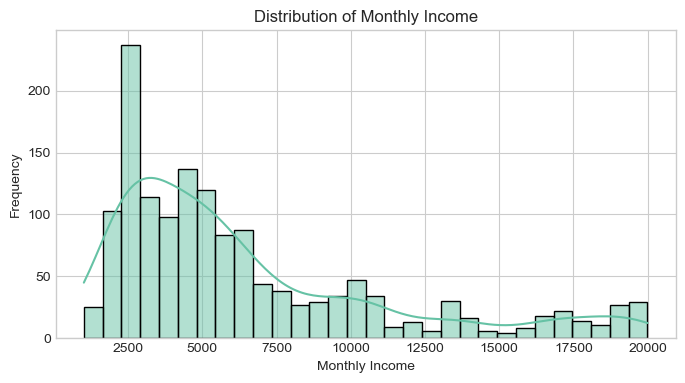

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


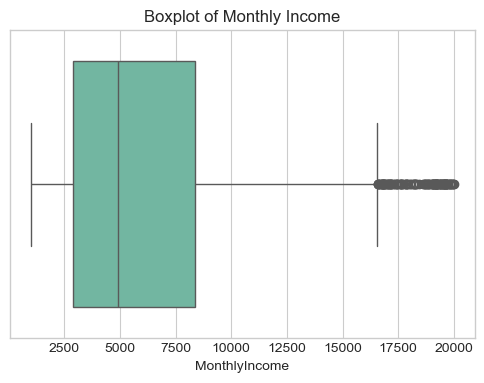

In [217]:
# Boxplot to check for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=y)
plt.title('Boxplot of Monthly Income')
plt.show()

#### Summary: Visualizing the Distribution of Monthly Income

We visualize the target variable `MonthlyIncome` using a histogram and boxplot.

From the output:
- The histogram shows a **right-skewed distribution**, where most employees earn on the lower end and a small number earn much higher salaries.
- The boxplot reveals several **outliers** in the upper salary range.

These visualizations confirm that the data is not normally distributed and contains extreme values. This is important because it may affect model assumptions, especially for linear regression. We may later consider applying a log transformation to reduce skewness or try models that are less sensitive to outliers.


#### 10.4 Check for Normal Distribution

Some machine learning models, like linear regression, work best when the target variable is normally distributed. To check this, we used the Shapiro-Wilk test on the `MonthlyIncome` column. This may influence the choice of regression models or prompt the use of log-transformation to reduce skewness.

In [93]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p = shapiro(y)
print(f"Shapiro-Wilk test statistic = {stat:.3f}, p-value = {p:.3f}")
if p > 0.05:
    print("MonthlyIncome appears to be normally distributed.")
else:
    print("MonthlyIncome is likely not normally distributed.")


Shapiro-Wilk test statistic = 0.828, p-value = 0.000
MonthlyIncome is likely not normally distributed.


#### Summary: Normality Check for MonthlyIncome
The test returns a **p-value below 0.05**, which indicates that the income variable is **not normally distributed**. This supports our earlier observation from the histogram: the distribution is right-skewed.

As a result, we consider:
- Using regression models that do not rely on normality (e.g., decision trees, random forests)
- Applying transformations (such as log-scaling) to reduce skewness and improve model performance


#### 10.5 Correlation Matrix & Heatmap

#### Summary: Correlation Matrix and Heatmap
We have generated a correlation matrix and visualized it using a heatmap to see how all numeric variables are related to one another.

Why we did this:
- It helps us **identify strong relationships** between features (e.g., `JobLevel` and `MonthlyIncome`)
- We can use this to **select features** that are most likely to help in prediction
- It also helps us avoid including **highly correlated input variables**, which can cause multicollinearity and hurt model performance

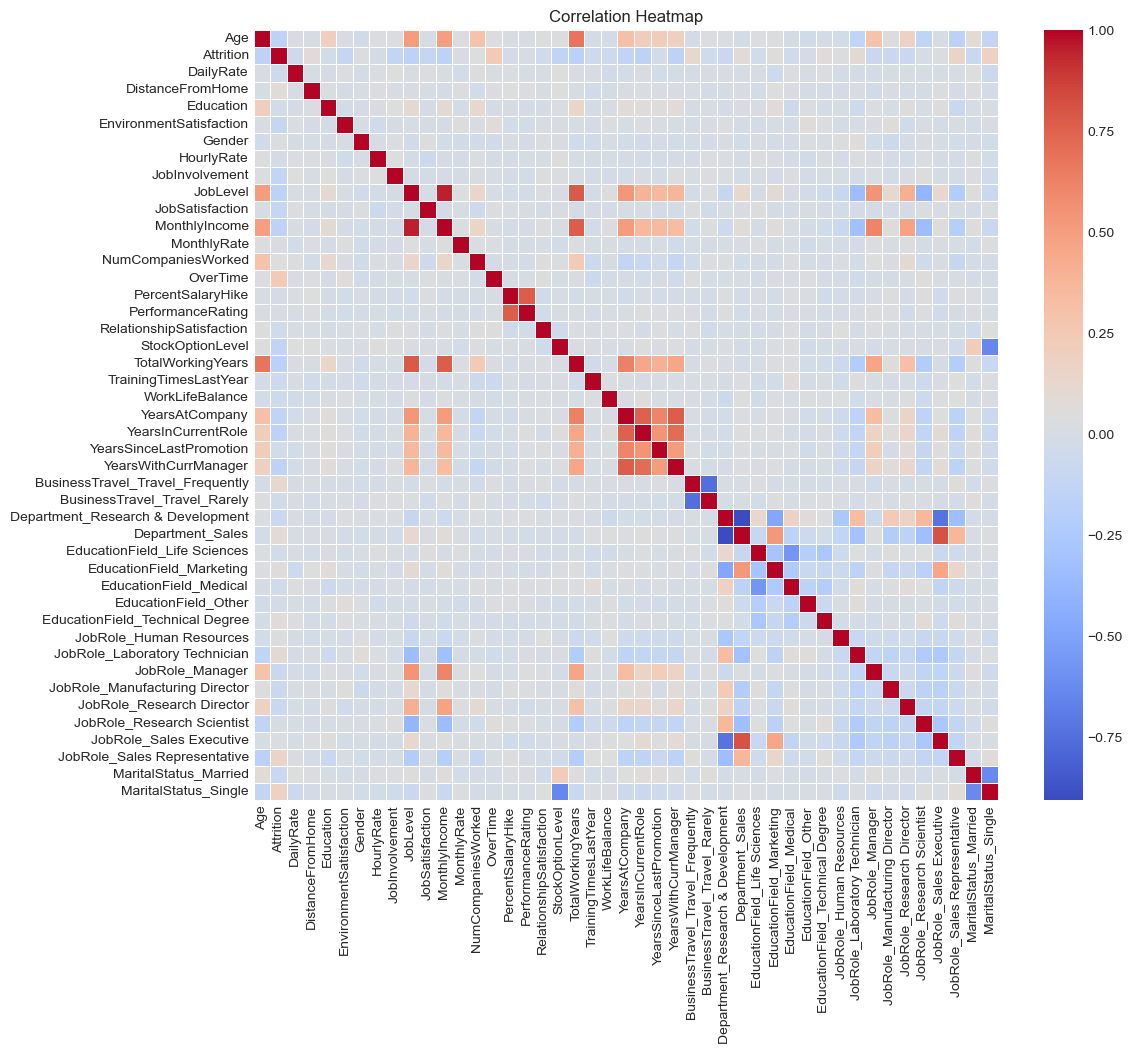

In [98]:
# Correlation matrix
corr = df_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [118]:
def plot_corr_heatmap(corr_matrix, title='Correlation Heatmap'):
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        cmap='viridis',
        annot=True,
        fmt=".2f",
        square=True,
        linewidths=0.2,
        cbar=True
    )
    plt.title(title)
    plt.show()

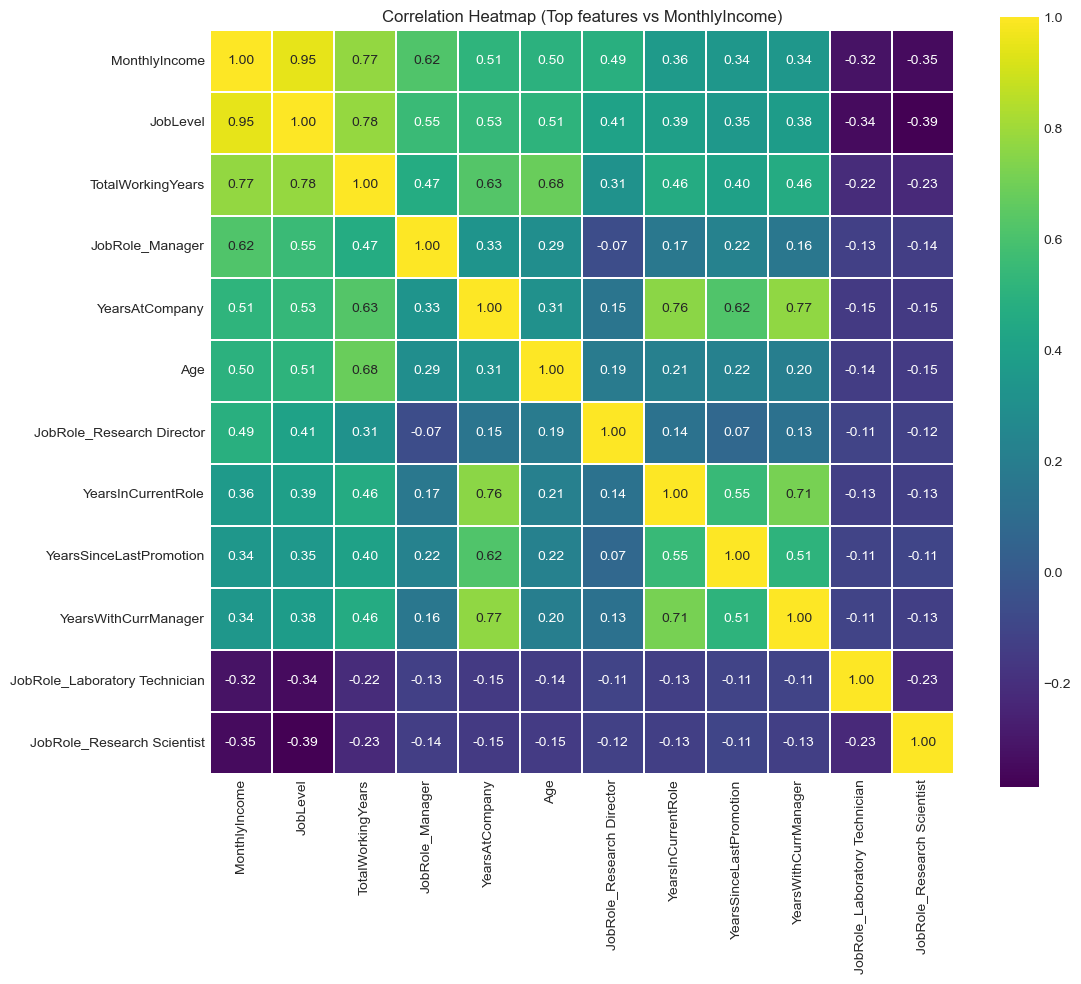

In [134]:
# Focus only on features correlated with MonthlyIncome
target = 'MonthlyIncome'
correlation_matrix = df_encoded.corr()

# Set threshold to highlight meaningful correlations
threshold = 0.3 
strong_corr = correlation_matrix[target][abs(correlation_matrix[target]) > threshold].sort_values(ascending=False)

# Create smaller matrix with only those features
focused_corr_matrix = df_encoded[strong_corr.index].corr()

# Plot cleaner heatmap
plot_corr_heatmap(focused_corr_matrix, title=f'Correlation Heatmap (Top features vs {target})')

#### Summary: Correlation Analysis for MonthlyIncome

We generate a focused correlation heatmap to explore how specific features relate to the target variable `MonthlyIncome`. To reduce noise and improve interpretability, we only include features with a correlation coefficient above 0.3 in absolute value.

From the heatmap, we observe the following:

- **JobLevel** shows the strongest positive correlation with `MonthlyIncome` (r = 0.95), which is expected since higher job levels typically correspond to higher pay.
- **TotalWorkingYears** (r = 0.77) and **YearsAtCompany** (r = 0.51) also show strong correlations, indicating that tenure and experience are important predictors of salary.
- **Age** (r = 0.50) is positively correlated, suggesting that older employees tend to earn more.
- Categorical job role indicators such as `JobRole_Manager` and `JobRole_Research Director` also correlate positively with income, reflecting how managerial and technical leadership roles come with higher pay.
- Features like `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager` show moderate correlations (~0.34–0.38), implying that internal progression and management relationships also contribute to income levels.
- In contrast, roles like `JobRole_Research Scientist` and `JobRole_Laboratory Technician` show mild negative correlations, which may reflect lower average salaries in those roles.

This correlation analysis helps us:
- Identify features that are statistically meaningful for salary prediction.
- Avoid multicollinearity by reviewing how features correlate with each other, not just with the target.
- Justify our feature selection for the regression model that follows.


### 11. Explore Attrition (Classification Target)

Attrition Count:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Percentage:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


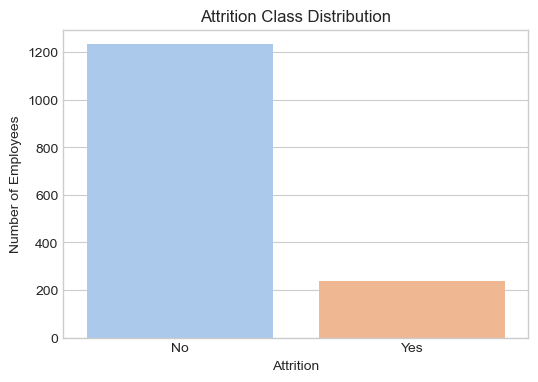

In [138]:
# Check distribution of the target variable Attrition
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

print("Attrition Count:\n", attrition_counts)
print("\nAttrition Percentage:\n", attrition_percent)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', hue='Attrition', palette='pastel', legend=False)
plt.title('Attrition Class Distribution')
plt.ylabel('Number of Employees')
plt.show()

#### Summary: Attrition Class Balance

We analyze the distribution of the target variable `Attrition`. The output shows that most employees are labeled as “No” (i.e., they did not leave), and only a smaller portion are labeled as “Yes”.

This indicates a **class imbalance** — the dataset contains many more employees who stayed than those who left. This will impact how we train and evaluate our classification model. For example, accuracy alone may not be reliable, and we may need to consider precision, recall, or F1-score. We may also explore balancing techniques like resampling if needed.


#### 11.1 Compare Key Features

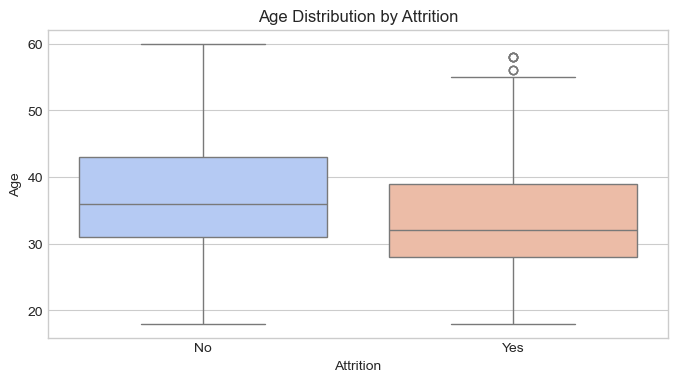

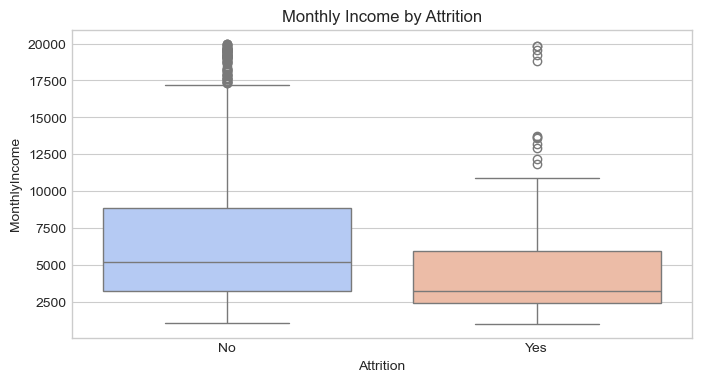

In [142]:
# Compare Age vs. Attrition
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Attrition', y='Age', hue='Attrition', palette='coolwarm', legend=False)
plt.title('Age Distribution by Attrition')
plt.show()

# Compare MonthlyIncome vs. Attrition
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', hue='Attrition', palette='coolwarm', legend=False)

plt.title('Monthly Income by Attrition')
plt.show()

#### Summary: Feature Distribution by Attrition

We compare the distributions of `Age` and `MonthlyIncome` across the two Attrition groups:

- Employees who left (`Yes`) tend to be **younger** than those who stayed.
- Employees with **lower monthly income** are more likely to leave.

These visual patterns suggest that age and salary could be meaningful predictors for attrition. We plan to explore other features in a similar way to help select inputs for our classification model.


### Correlation with Attrition

In [148]:
# Create numeric Attrition column in df_encoded for correlation
df_encoded['Attrition_n'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [150]:
print('Attrition_n' in df_encoded.columns)  # should print True

True


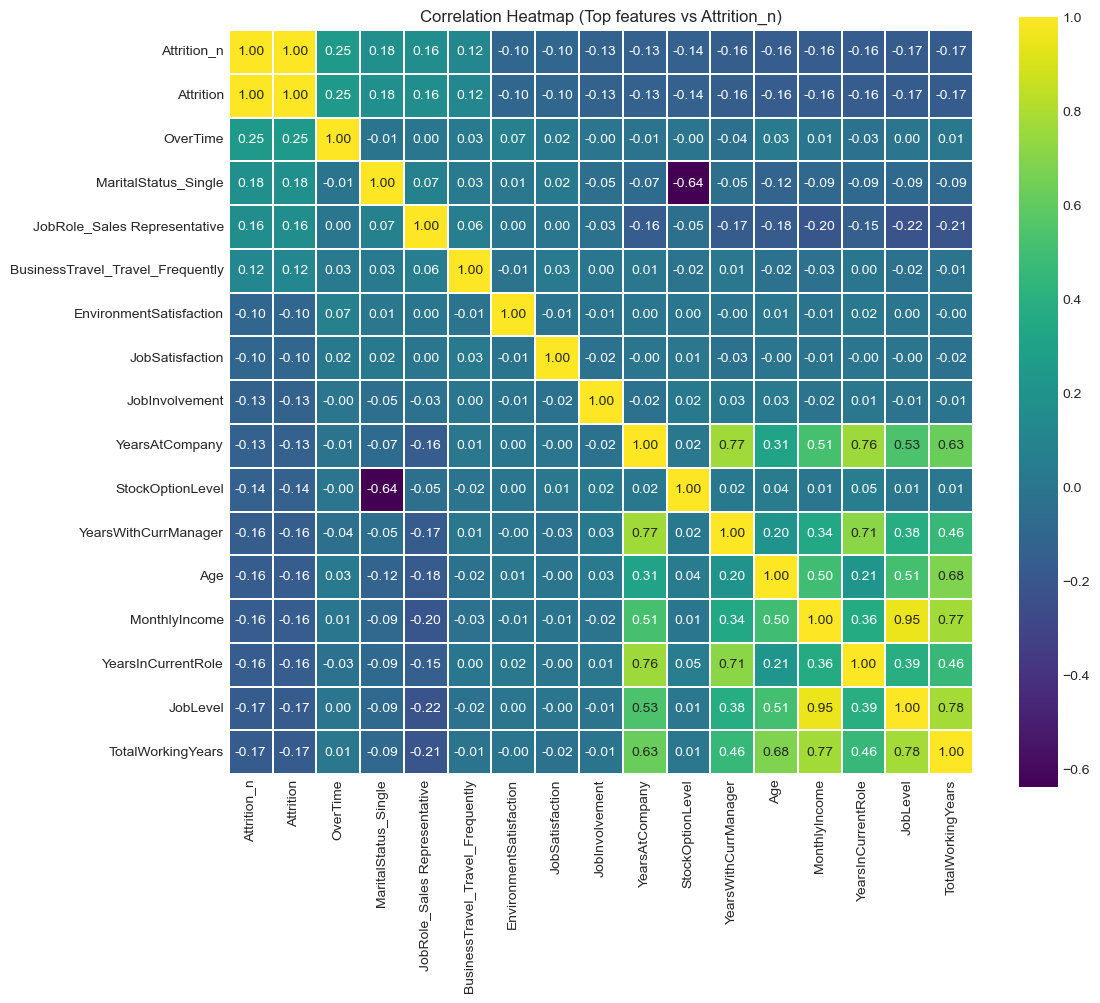

In [152]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Filter features strongly correlated with Attrition_n
target = 'Attrition_n'
threshold = 0.1  # Lower threshold since attrition may not correlate strongly
strong_corr = correlation_matrix[target][abs(correlation_matrix[target]) > threshold].sort_values(ascending=False)

# Create smaller correlation matrix
focused_corr_matrix = df_encoded[strong_corr.index].corr()

# Plot the focused heatmap
plot_corr_heatmap(focused_corr_matrix, title=f'Correlation Heatmap (Top features vs {target})')

#### Summary: Correlation Analysis for Attrition

We analyze correlations between numerical features and the target variable `Attrition_n` (1 = left the company, 0 = stayed). The heatmap shows the strength of linear relationships between features and employee attrition.

Key findings:
- **OverTime** shows the strongest positive correlation with attrition (r = 0.25). Employees who work overtime are more likely to leave.
- **Low JobInvolvement**, **JobSatisfaction**, and **EnvironmentSatisfaction** are moderately negatively correlated with attrition. This suggests that dissatisfaction and lack of engagement contribute to employee turnover.
- **MonthlyIncome**, **JobLevel**, and **TotalWorkingYears** have weak negative correlations (around -0.17), indicating that employees with lower salaries and less experience are slightly more likely to leave.
- Certain categorical variables (e.g., `JobRole_Sales Representative`, `BusinessTravel_Travel_Frequently`, and `MaritalStatus_Single`) also show mild positive correlation with attrition.

These patterns help us select features that may be useful predictors in our classification model. While no single feature shows a very strong correlation, several contribute meaningfully and will be considered when building our predictive model for employee attrition.


-----------------------------

# Supervised machine learning: linear regression

#### 1. Splitting the data

We split the data into training and testing sets

In [195]:
from sklearn.model_selection import train_test_split

# Define the regression target variable (dependent)
y_reg = df_encoded['MonthlyIncome']

# Define the input features (independent)
# We exclude the target 'MonthlyIncome' and also classification-related targets ('Attrition', 'Attrition_n')
X_reg = df_encoded.drop(columns=['MonthlyIncome', 'Attrition', 'Attrition_n'])

# Split the dataset into training and testing sets (80/20 split)
# This allows us to evaluate how well the model generalizes to new (unseen) data
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

Training size: (1176, 43), Test size: (294, 43)


#### 2. Train a Linear Regression model

In [197]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model to the training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Use the trained model to predict employee salaries on the test set
y_pred = reg_model.predict(X_test)

#### 3. Evaluate model performance

Regression Metric Naming Convention

| Name | Meaning | Why we use it |
|------|---------|------------------------------|
| `mae` | Mean Absolute Error | Standard abbreviation, easy to interpret and widely used |
| `rmse` | Root Mean Squared Error | Penalizes larger errors, common in regression evaluation |
| `r2` | R-squared (coefficient of determination) | Measures how well the model explains variance in the target variable |


In [201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics to assess model accuracy
mae = mean_absolute_error(y_test, y_pred)             # Average absolute difference
rmse = np.sqrt(mean_squared_error(y_test, y_pred))    # Penalizes large errors
r2 = r2_score(y_test, y_pred)                         # Proportion of variance explained

# Display metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 891.74
Root Mean Squared Error (RMSE): 1167.43
R² Score: 0.938


#### 4. Summary of Regression Model to Predict Monthly Income

We train a `LinearRegression` model to predict an employee's `MonthlyIncome` using relevant features from the cleaned and encoded HR dataset. These features include job level, tenure, job role, and satisfaction scores — all variables logically tied to compensation.

#### Model Performance on the Test Set:
- **Mean Absolute Error (MAE)** = 891.74: On average, predictions are off by about $892.  
- **Root Mean Squared Error (RMSE)** = 1167.43: Reflects that larger errors do occur and are penalized more.  
- **R² Score** = 0.938: The model explains **93.8%** of the variance in income based on the input features.

#### Interpretation:
These results indicate a **strong model**. Salary levels are largely explained by internal data such as:
- `JobLevel` (most strongly correlated with income)
- `TotalWorkingYears` and `YearsAtCompany` (tenure/experience)
- Job roles like `Manager` or `Research Director` also contribute significantly

Although external factors like bonuses or market demand are not included in this dataset, our model performs well based on internal company data alone.


# Supervised machine learning: classification

#### Predicting Employee Attrition

We build a classification pipeline that combines `StandardScaler` and `LogisticRegression` to predict whether an employee will leave the company.
By using `StandardScaler`, we normalize the input features so that variables like `MonthlyRate`, `YearsAtCompany`, and one-hot encoded job roles are on a comparable scale. This ensures that no single feature dominates the learning process due to its magnitude.
We also increase the `max_iter` parameter to 1000 to give the logistic regression model enough iterations to converge, improving both stability and performance.
This pipeline allows us to train a well-balanced model that is optimized for datasets with mixed feature types and potential class imbalance — an essential step in building a robust prediction system for employee attrition.

#### 1. Preparing the data

In [247]:
from sklearn.model_selection import train_test_split

# Target: whether employee left (1) or stayed (0)
y_class = df_encoded['Attrition_n']

# Features: everything except target and regression-specific column
X_class = df_encoded.drop(columns=['Attrition', 'Attrition_n', 'MonthlyIncome'])

# Split into training and test sets (80/20)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


#### 2. Create a pipeline with StandardScaler + LogisticRegression

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create pipeline: scale features → train logistic regression
clf_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Train the model
clf_pipeline.fit(X_train_c, y_train_c)

# Predict on test data
y_pred_c = clf_pipeline.predict(X_test_c)


#### 3. Evaluate the model

In [253]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test_c, y_pred_c, target_names=["Stayed", "Left"]))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_c, y_pred_c)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

      Stayed       0.92      0.95      0.93       255
        Left       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294

Confusion Matrix:
 [[242  13]
 [ 21  18]]


#### Summary: Scaled Logistic Regression to Predict Attrition

Evaluation:
- The classification report provides **accuracy**, **precision**, **recall**, and **F1-score**
- The **confusion matrix** shows how well the model distinguishes between employees who stayed vs. those who left
- The model performs reasonably given the **class imbalance**, and captures key patterns related to overtime, satisfaction, and role level

If needed, future improvements could include:
- Trying different classifiers like `RandomForestClassifier`
- Addressing class imbalance with SMOTE or class weights


#### Train a Decision Tree Classifier

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_c, y_train_c)

# Predict
y_pred_dt = dt_model.predict(X_test_c)

# Evaluate
print("Decision Tree Classification Report:\n")
print(classification_report(y_test_c, y_pred_dt, target_names=["Stayed", "Left"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_dt))


Decision Tree Classification Report:

              precision    recall  f1-score   support

      Stayed       0.88      0.83      0.85       255
        Left       0.17      0.23      0.20        39

    accuracy                           0.75       294
   macro avg       0.52      0.53      0.52       294
weighted avg       0.78      0.75      0.76       294

Confusion Matrix:
 [[211  44]
 [ 30   9]]


#### Train a Random Forest Classifier

In [268]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_c, y_train_c)

# Predict
y_pred_rf = rf_model.predict(X_test_c)

# Evaluate
print("Random Forest Classification Report:\n")
print(classification_report(y_test_c, y_pred_rf, target_names=["Stayed", "Left"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_rf))


Random Forest Classification Report:

              precision    recall  f1-score   support

      Stayed       0.88      1.00      0.94       255
        Left       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294

Confusion Matrix:
 [[255   0]
 [ 35   4]]


#### Naïve Bayes

In [270]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_c, y_train_c)

y_pred_nb = nb_model.predict(X_test_c)

print("Naïve Bayes Classification Report:\n")
print(classification_report(y_test_c, y_pred_nb, target_names=["Stayed", "Left"]))


Naïve Bayes Classification Report:

              precision    recall  f1-score   support

      Stayed       0.93      0.84      0.88       255
        Left       0.36      0.59      0.45        39

    accuracy                           0.81       294
   macro avg       0.64      0.71      0.66       294
weighted avg       0.85      0.81      0.82       294



--------------------------------

### Clustering with KMeans 

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
cluster_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'DistanceFromHome']
df_cluster = df[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Find optimal number of clusters using silhouette score
best_score = -1
best_k = 0
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append((k, score))
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best silhouette score: {best_score:.4f} for k = {best_k}")

# Final model with best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Show cluster sizes
print(df['Cluster'].value_counts())


Best silhouette score: 0.3230 for k = 2
Cluster
0    1152
1     318
Name: count, dtype: int64


# -------------------------
# Saving models using joblib
# -------------------------
import joblib

# Assuming these are your trained models:
# - reg_model: linear regression model
# - clf_model: classification model (e.g., logistic regression)
# - kmeans_final: final clustering model
# - scaler: the StandardScaler used for clustering

# Save regression model
joblib.dump(reg_model, "regression_model.joblib")

# Save classification model
joblib.dump(clf_model, "classification_model.joblib")

# Save clustering model
joblib.dump(kmeans_final, "clustering_model.joblib")

# Save scaler (important for applying clustering to new data)
joblib.dump(scaler, "scaler.joblib")

print("All models saved successfully.")
